In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/NLP2

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/NLP2


In [ ]:
import pandas as pd

# Load the combined tweets CSV file
combined_tweets_loaded = pd.read_csv('combined_tweets.csv')

# Display basic information about the loaded data
print("**Loaded combined_tweets.csv successfully!**")
print(f"\nDataset shape: {combined_tweets_loaded.shape}")
print(f"Number of tweets: {len(combined_tweets_loaded)}")
print(f"\nColumns: {combined_tweets_loaded.columns.tolist()}")

# Show first few rows
print("\n**First 5 tweets:**")
print(combined_tweets_loaded.head())

# Check sentiment distribution
print("\n**Sentiment distribution:**")
print(combined_tweets_loaded['Sentiment'].value_counts())

# Display data types
print("\n**Data types:**")
print(combined_tweets_loaded.dtypes)

# Check for any missing values
print("\n**Missing values:**")
print(combined_tweets_loaded.isnull().sum())

# Example: Access specific tweets
print("\n**Example - First tweet:**")
print(f"Tweet: {combined_tweets_loaded.iloc[0]['Tweet']}")
print(f"Sentiment: {combined_tweets_loaded.iloc[0]['Sentiment']}")


**Loaded combined_tweets.csv successfully!**

Dataset shape: (17352, 2)
Number of tweets: 17352

Columns: ['Tweet', 'Sentiment']

**First 5 tweets:**
                                               Tweet Sentiment
0  THEY CALLED OFFSIDES ?!?!? \nNAH THIS IS RIGGE...  negative
1  I demand that only @shakira and @KNAAN be able...  negative
2  𝐉𝐮𝐬𝐭 𝐩𝐢𝐧𝐜𝐡𝐞𝐝 𝐨𝐮𝐫𝐬𝐞𝐥𝐯𝐞𝐬 𝐭𝐨 𝐜𝐡𝐞𝐜𝐤 𝐢𝐟 𝐢𝐭 𝐢𝐬 𝐫𝐞𝐚𝐥,...  positive
3  #Valencia was a former premier player #WorldCu...   neutral
4                     Corrupt already😂 #WorldCup2022  negative

**Sentiment distribution:**
Sentiment
negative    5784
positive    5784
neutral     5784
Name: count, dtype: int64

**Data types:**
Tweet        object
Sentiment    object
dtype: object

**Missing values:**
Tweet        0
Sentiment    0
dtype: int64

**Example - First tweet:**
Tweet: THEY CALLED OFFSIDES ?!?!? 
NAH THIS IS RIGGED #WorldCup2022
Sentiment: negative


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# First, let's check the current distribution
print("**Original dataset info:**")
print(f"Total samples: {len(combined_tweets_loaded)}")
print("\nSentiment distribution:")
print(combined_tweets_loaded['Sentiment'].value_counts())

# Separate features and labels
X = combined_tweets_loaded['Tweet']
y = combined_tweets_loaded['Sentiment']

# First split: 70% train, 30% temp (which will be split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # This ensures balanced classes
)

# Second split: Split the temp set (30%) into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 0.5 of 30% = 15% of total
    random_state=42,
    stratify=y_temp
)

# Create dataframes for each set
train_df = pd.DataFrame({'Tweet': X_train, 'Sentiment': y_train})
val_df = pd.DataFrame({'Tweet': X_val, 'Sentiment': y_val})
test_df = pd.DataFrame({'Tweet': X_test, 'Sentiment': y_test})

# Display the results
print("\n**Dataset Split Summary:**")
print("=" * 60)
print(f"Total samples: {len(combined_tweets_loaded)}")
print(f"Train set: {len(train_df)} samples ({len(train_df)/len(combined_tweets_loaded)*100:.1f}%)")
print(f"Validation set: {len(val_df)} samples ({len(val_df)/len(combined_tweets_loaded)*100:.1f}%)")
print(f"Test set: {len(test_df)} samples ({len(test_df)/len(combined_tweets_loaded)*100:.1f}%)")

# Show class distribution for each set
print("\n**Train Set Class Distribution:**")
train_counts = train_df['Sentiment'].value_counts().sort_index()
for sentiment, count in train_counts.items():
    percentage = (count / len(train_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

print("\n**Validation Set Class Distribution:**")
val_counts = val_df['Sentiment'].value_counts().sort_index()
for sentiment, count in val_counts.items():
    percentage = (count / len(val_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

print("\n**Test Set Class Distribution:**")
test_counts = test_df['Sentiment'].value_counts().sort_index()
for sentiment, count in test_counts.items():
    percentage = (count / len(test_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

# Verify stratification worked correctly
print("\n**Verification - Class balance maintained:**")
print(f"Original positive ratio: {(combined_tweets_loaded['Sentiment']=='positive').sum()/len(combined_tweets_loaded)*100:.2f}%")
print(f"Train positive ratio: {(train_df['Sentiment']=='positive').sum()/len(train_df)*100:.2f}%")
print(f"Val positive ratio: {(val_df['Sentiment']=='positive').sum()/len(val_df)*100:.2f}%")
print(f"Test positive ratio: {(test_df['Sentiment']=='positive').sum()/len(test_df)*100:.2f}%")


**Original dataset info:**
Total samples: 17352

Sentiment distribution:
Sentiment
negative    5784
positive    5784
neutral     5784
Name: count, dtype: int64

**Dataset Split Summary:**
Total samples: 17352
Train set: 12146 samples (70.0%)
Validation set: 2603 samples (15.0%)
Test set: 2603 samples (15.0%)

**Train Set Class Distribution:**
  negative: 4049 (33.34%)
  neutral: 4049 (33.34%)
  positive: 4048 (33.33%)

**Validation Set Class Distribution:**
  negative: 867 (33.31%)
  neutral: 868 (33.35%)
  positive: 868 (33.35%)

**Test Set Class Distribution:**
  negative: 868 (33.35%)
  neutral: 867 (33.31%)
  positive: 868 (33.35%)

**Verification - Class balance maintained:**
Original positive ratio: 33.33%
Train positive ratio: 33.33%
Val positive ratio: 33.35%
Test positive ratio: 33.35%


In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModel,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from torch import nn
from datasets import Dataset, DatasetDict
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Custom Regression Model Class - DÜZELTILMIŞ
class RobertaForRegression(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        # Load base RoBERTa model
        self.roberta = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.1)
        # Regression head with single output
        self.regressor = nn.Linear(self.roberta.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        # Use pooled output
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)

        # Get regression output
        logits = self.regressor(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = nn.MSELoss()
            loss = loss_fct(logits.squeeze(), labels.squeeze())

        # Return a proper output format that Trainer expects
        if loss is not None:
            return {"loss": loss, "logits": logits}
        else:
            return {"logits": logits}

# Alternatif olarak, daha temiz bir yaklaşım için ModelOutput kullanabilirsiniz:
from transformers.modeling_outputs import SequenceClassifierOutput

class RobertaForRegressionV2(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        # Load base RoBERTa model
        self.roberta = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.1)
        # Regression head with single output
        self.regressor = nn.Linear(self.roberta.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        # Use pooled output
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)

        # Get regression output
        logits = self.regressor(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = nn.MSELoss()
            loss = loss_fct(logits.squeeze(), labels.squeeze())

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions
        )

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

# Initialize custom regression model - V2 kullanıyoruz
model = RobertaForRegressionV2("cardiffnlp/twitter-roberta-base-sentiment-latest")

# Create label mappings for converting categorical to continuous
label_to_score = {
    "negative": -1.0,
    "neutral": 0.0,
    "positive": 1.0
}

# Convert dataframes to HuggingFace datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Create DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

# Tokenization function for regression
def tokenize_function(examples):
    # Convert sentiment labels to continuous scores
    labels = [label_to_score[label] for label in examples['Sentiment']]

    # Tokenize the tweets
    encoding = tokenizer(
        examples['Tweet'],
        padding='max_length',
        truncation=True,
        max_length=128
    )

    # Add labels as float values
    encoding['labels'] = labels

    return encoding

# Apply tokenization
tokenized_datasets = dataset_dict.map(
    tokenize_function,
    batched=True,
    remove_columns=['Tweet', 'Sentiment']
)

# Define metrics computation for regression
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # For regression, predictions are already continuous values
    predictions = predictions.squeeze()
    labels = labels.squeeze()

    # Clip predictions to [-1, 1] range
    predictions = np.clip(predictions, -1, 1)

    # Calculate regression metrics
    mse = mean_squared_error(labels, predictions)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)

    # Calculate correlation
    correlation = np.corrcoef(predictions, labels)[0, 1]

    return {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'correlation': correlation,
        'rmse': np.sqrt(mse)
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./twitter-roberta-sentiment-regression',
    num_train_epochs=100,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    save_total_limit=3,
    fp16=True,
    report_to="none",
    push_to_hub=False,
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        EarlyStoppingCallback(
            early_stopping_patience=5,
            early_stopping_threshold=0.0001
        )
    ]
)

# Train the model
print("Starting training for sentiment intensity regression...")
print("Output range: [-1, 1] where -1=most negative, 0=neutral, 1=most positive")
print("Early stopping configured: monitoring validation loss with patience=5")
print("-" * 60)

train_result = trainer.train()

# Print training results
print("\n**Training completed!**")
print(f"Training loss: {train_result.training_loss:.4f}")
print(f"Training runtime: {train_result.metrics['train_runtime']:.2f} seconds")
print(f"Training samples per second: {train_result.metrics['train_samples_per_second']:.2f}")
print(f"Total epochs trained: {trainer.state.epoch}")

# Get best validation loss
best_val_loss = min([log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log])
print(f"Best validation loss: {best_val_loss:.4f}")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Map:   0%|          | 0/12146 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Map:   0%|          | 0/2603 [00:00<?, ? examples/s]

Map:   0%|          | 0/2603 [00:00<?, ? examples/s]

Starting training for sentiment intensity regression...
Output range: [-1, 1] where -1=most negative, 0=neutral, 1=most positive
Early stopping configured: monitoring validation loss with patience=5
------------------------------------------------------------


Epoch,Training Loss,Validation Loss,Mse,Mae,R2,Correlation,Rmse
1,0.179000,0.231626,0.231626,0.312883,0.652494,0.828328,0.481275
2,0.133900,0.172798,0.172590,0.242526,0.741065,0.876842,0.415440
3,0.098600,0.169499,0.152806,0.173036,0.770748,0.883207,0.390904
4,0.068400,0.139493,0.134086,0.159031,0.798833,0.896825,0.366177
5,0.053400,0.146013,0.143961,0.170822,0.784017,0.890224,0.379422
6,0.037100,0.167740,0.161299,0.161377,0.758005,0.877566,0.401620
7,0.027800,0.208295,0.198688,0.173784,0.701911,0.856557,0.445744
8,0.034400,0.226226,0.221484,0.207255,0.667710,0.846997,0.470621
9,0.023400,0.183823,0.177170,0.183942,0.734193,0.869165,0.420916



**Training completed!**
Training loss: 0.0706
Training runtime: 1132.32 seconds
Training samples per second: 1072.67
Total epochs trained: 9.0
Best validation loss: 0.1395


In [ ]:
# Evaluate on test set
print("\n**Evaluating on test set...**")
test_results = trainer.evaluate(eval_dataset=tokenized_datasets['test'])

print("\nTest Results:")
print(f"Test Loss: {test_results['eval_loss']:.4f}")
print(f"Test MSE: {test_results['eval_mse']:.4f}")
print(f"Test MAE: {test_results['eval_mae']:.4f}")
print(f"Test RMSE: {test_results['eval_rmse']:.4f}")
print(f"Test R²: {test_results['eval_r2']:.4f}")
print(f"Test Correlation: {test_results['eval_correlation']:.4f}")


**Evaluating on test set...**



Test Results:
Test Loss: 0.1357
Test MSE: 0.1301
Test MAE: 0.1540
Test RMSE: 0.3606
Test R²: 0.8050
Test Correlation: 0.8999


In [ ]:
# Model Kaydetme Fonksiyonu
def save_regression_model(model, tokenizer, save_path="./twitter-roberta-sentiment-regression-final"):
    """
    Regression modelini ve tokenizer'ı kaydet

    Args:
        model: Eğitilmiş model
        tokenizer: Kullanılan tokenizer
        save_path: Modelin kaydedileceği dizin
    """
    import os
    import torch
    import json

    # Dizini oluştur
    os.makedirs(save_path, exist_ok=True)

    # Model state_dict'ini kaydet
    torch.save(model.state_dict(), os.path.join(save_path, "model.pt"))

    # Tokenizer'ı kaydet
    tokenizer.save_pretrained(save_path)

    # Model config'ini kaydet
    config = {
        "model_type": "roberta_regression",
        "base_model": "cardiffnlp/twitter-roberta-base-sentiment-latest",
        "output_range": [-1, 1],
        "task": "sentiment_intensity_regression"
    }

    with open(os.path.join(save_path, "model_config.json"), "w") as f:
        json.dump(config, f, indent=2)

    print(f"✅ Model başarıyla kaydedildi: {save_path}")
    print(f"   - model.pt (model weights)")
    print(f"   - tokenizer files")
    print(f"   - model_config.json")

# Trainer ile eğitimden sonra modeli kaydet
save_regression_model(model, tokenizer)

# Alternatif: Trainer'ın save_model metodunu kullan
# trainer.save_model('./twitter-roberta-sentiment-regression-final')


✅ Model başarıyla kaydedildi: ./twitter-roberta-sentiment-regression-final
   - model.pt (model weights)
   - tokenizer files
   - model_config.json


In [2]:
# Model Yükleme Fonksiyonu
def load_regression_model(model_path="./twitter-roberta-sentiment-regression-final"):
    """
    Kaydedilmiş regression modelini yükle

    Args:
        model_path: Modelin kaydedildiği dizin

    Returns:
        model: Yüklenmiş model
        tokenizer: Yüklenmiş tokenizer
        config: Model konfigürasyonu
    """
    import os
    import torch
    import json
    from transformers import AutoTokenizer, AutoModel
    from torch import nn

    # Model sınıfını tekrar tanımla
    class RobertaForRegressionV2(nn.Module):
        def __init__(self, model_name):
            super().__init__()
            self.roberta = AutoModel.from_pretrained(model_name)
            self.dropout = nn.Dropout(0.1)
            self.regressor = nn.Linear(self.roberta.config.hidden_size, 1)

        def forward(self, input_ids, attention_mask=None, labels=None):
            outputs = self.roberta(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            pooled_output = outputs.pooler_output
            pooled_output = self.dropout(pooled_output)
            logits = self.regressor(pooled_output)

            loss = None
            if labels is not None:
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.squeeze(), labels.squeeze())

            from transformers.modeling_outputs import SequenceClassifierOutput
            return SequenceClassifierOutput(
                loss=loss,
                logits=logits,
                hidden_states=outputs.hidden_states,
                attentions=outputs.attentions
            )

    # Config'i yükle
    with open(os.path.join(model_path, "model_config.json"), "r") as f:
        config = json.load(f)

    # Tokenizer'ı yükle
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    # Model'i initialize et
    model = RobertaForRegressionV2(config["base_model"])

    # Model ağırlıklarını yükle
    model.load_state_dict(torch.load(os.path.join(model_path, "model.pt"), map_location='cpu'))

    # Model'i eval moduna al
    model.eval()

    print(f"✅ Model başarıyla yüklendi: {model_path}")
    print(f"   - Model tipi: {config['model_type']}")
    print(f"   - Task: {config['task']}")
    print(f"   - Output range: {config['output_range']}")

    return model, tokenizer, config

# Modeli yükle
loaded_model, loaded_tokenizer, model_config = load_regression_model()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

✅ Model başarıyla yüklendi: ./twitter-roberta-sentiment-regression-final
   - Model tipi: roberta_regression
   - Task: sentiment_intensity_regression
   - Output range: [-1, 1]


# Regression to Classification

🚀 Test seti değerlendirmesi başlıyor...
Test seti boyutu: 2603 örnek

🤖 Test seti üzerinde tahminler yapılıyor...
🔍 Optimal eşik arama başlıyor...
Negatif eşik aralığı: -0.80 - -0.00
Pozitif eşik aralığı: 0.05 - 0.79
------------------------------------------------------------

📊 En iyi 5 eşik kombinasyonu:
 neg_threshold  pos_threshold  f1_score
        -0.305          0.715  0.873160
        -0.305          0.685  0.873132
        -0.305          0.690  0.873132
        -0.305          0.740  0.872946
        -0.305          0.730  0.872846

✅ Optimal eşikler bulundu:
   Negatif eşik: -0.305
   Pozitif eşik: 0.715
   En iyi F1 skoru: 0.8732

📈 Model Performans Metrikleri:
Accuracy:  0.8728
Precision: 0.8736
Recall:    0.8728
F1-Score:  0.8732

📊 Sınıf Bazlı Metrikler:
------------------------------------------------------------
Negative - Precision: 0.903, Recall: 0.895, F1: 0.899
Neutral  - Precision: 0.812, Recall: 0.833, F1: 0.822
Positive - Precision: 0.905, Recall: 0.891, F1: 0.

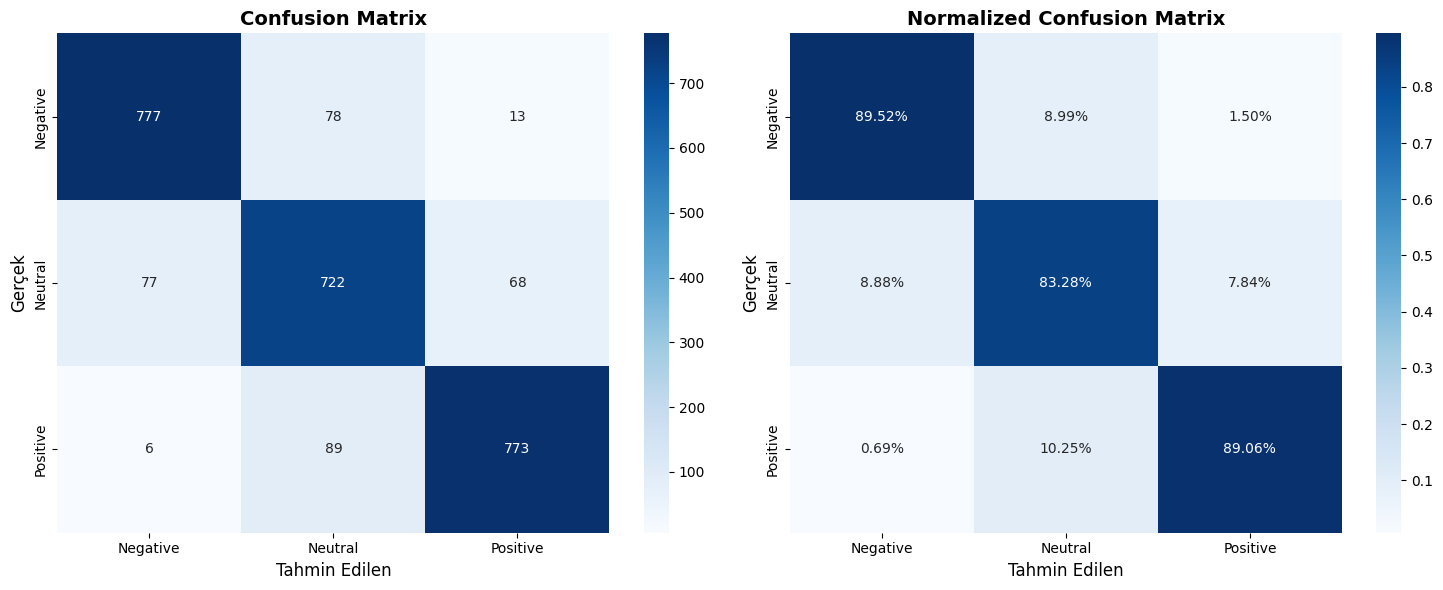

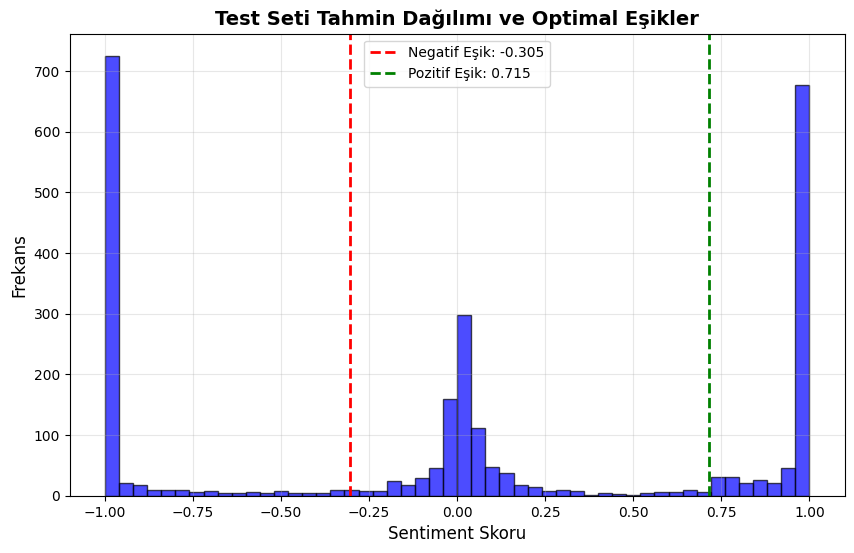

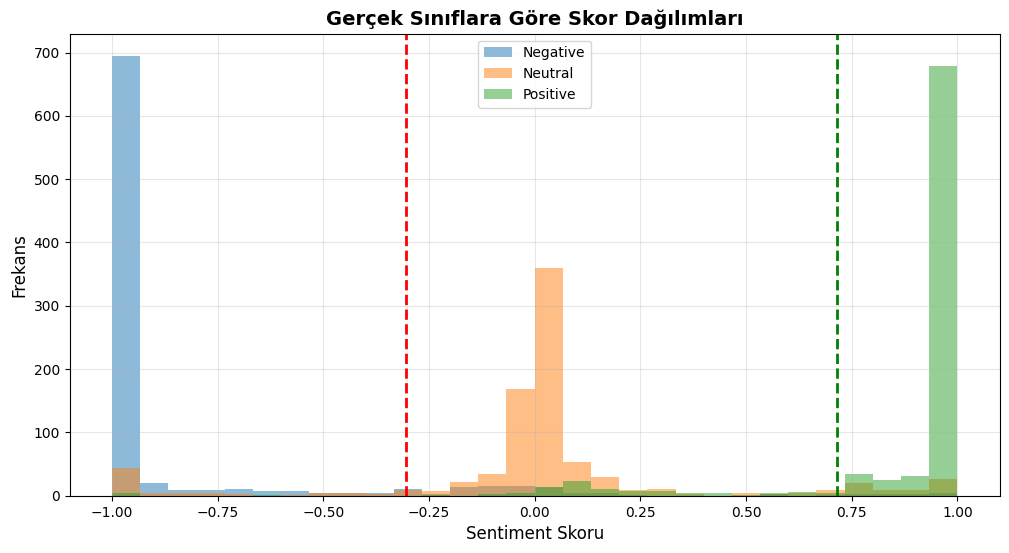


🔍 Örnek Tahminler:
--------------------------------------------------------------------------------
Metin: 'Printing money #WorldCup2022 https://t.co/IXAcQQB2c9...'
Gerçek: neutral, Tahmin: neutral (Skor: -0.012)
--------------------------------------------------------------------------------
Metin: '#BoycottQatar2022 
#WorldCup2022 my ass.
Go read about what'...'
Gerçek: negative, Tahmin: negative (Skor: -1.000)
--------------------------------------------------------------------------------
Metin: 'The World Cup 2022 kicks off today, and what better to share...'
Gerçek: positive, Tahmin: positive (Skor: 0.907)
--------------------------------------------------------------------------------
Metin: 'This is all just a carefully orchestrated script to teach no...'
Gerçek: negative, Tahmin: negative (Skor: -0.910)
--------------------------------------------------------------------------------
Metin: 'Can Qatar pull the feed if they wanted? #WorldCup2022...'
Gerçek: neutral, Tahmin: neu

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import torch

def batch_predict_sentiment(texts, model, tokenizer, batch_size=32):
    """
    Birden fazla metin için toplu tahmin yap

    Args:
        texts: Metin listesi
        model: Yüklenmiş model
        tokenizer: Yüklenmiş tokenizer
        batch_size: Batch boyutu

    Returns:
        list: Sentiment skorları listesi
    """
    from torch.utils.data import DataLoader, Dataset

    class TextDataset(Dataset):
        def __init__(self, texts, tokenizer):
            self.texts = texts
            self.tokenizer = tokenizer

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            return self.texts[idx]

    # Dataset oluştur
    dataset = TextDataset(texts, tokenizer)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    model.eval()
    predictions = []

    with torch.no_grad():
        for batch_texts in dataloader:
            # Tokenize et
            inputs = tokenizer(
                list(batch_texts),
                return_tensors="pt",
                truncation=True,
                padding=True,
                max_length=128
            )

            # GPU'ya taşı (eğer varsa)
            if torch.cuda.is_available():
                inputs = {k: v.cuda() for k, v in inputs.items()}
                model = model.cuda()

            # Tahmin yap
            outputs = model(**inputs)
            batch_predictions = outputs.logits.squeeze().cpu().numpy()

            # Tek değer ise liste yap
            if batch_predictions.ndim == 0:
                batch_predictions = [batch_predictions.item()]

            # Listeye ekle
            predictions.extend(batch_predictions)

    # [-1, 1] aralığına sınırla
    predictions = [np.clip(p, -1, 1) for p in predictions]

    return predictions

def find_optimal_thresholds(predictions, true_labels, label_to_score):
    """
    Grid search ile optimal eşikleri bul

    Args:
        predictions: Model tahminleri (-1 ile 1 arası)
        true_labels: Gerçek etiketler (categorical)
        label_to_score: Label-skor eşleşmesi

    Returns:
        optimal_thresholds: (negative_threshold, positive_threshold)
        best_f1: En iyi F1 skoru
    """
    # Gerçek etiketleri sayısal değerlere dönüştür
    true_numeric = np.array([label_to_score[label] for label in true_labels])

    # Eşik aralıklarını tanımla
    negative_thresholds = np.arange(-0.8, 0, 0.005)  # -0.8'den 0'a kadar
    positive_thresholds = np.arange(0.05, 0.8, 0.005)  # 0.05'ten 0.8'e kadar

    best_f1 = -1
    best_thresholds = None
    results = []

    print("🔍 Optimal eşik arama başlıyor...")
    print(f"Negatif eşik aralığı: {negative_thresholds[0]:.2f} - {negative_thresholds[-1]:.2f}")
    print(f"Pozitif eşik aralığı: {positive_thresholds[0]:.2f} - {positive_thresholds[-1]:.2f}")
    print("-" * 60)

    # Grid search
    for neg_thresh, pos_thresh in product(negative_thresholds, positive_thresholds):
        # Tahminleri sınıflandır
        classified = []
        for pred in predictions:
            if pred < neg_thresh:
                classified.append(-1)  # negative
            elif pred > pos_thresh:
                classified.append(1)   # positive
            else:
                classified.append(0)   # neutral

        classified = np.array(classified)

        # F1 skorunu hesapla
        f1 = f1_score(true_numeric, classified, average='weighted')

        results.append({
            'neg_threshold': neg_thresh,
            'pos_threshold': pos_thresh,
            'f1_score': f1
        })

        if f1 > best_f1:
            best_f1 = f1
            best_thresholds = (neg_thresh, pos_thresh)

    # En iyi 5 sonucu göster
    results_df = pd.DataFrame(results)
    top_results = results_df.nlargest(5, 'f1_score')

    print("\n📊 En iyi 5 eşik kombinasyonu:")
    print(top_results.to_string(index=False))

    return best_thresholds, best_f1

def classify_with_thresholds(predictions, neg_threshold, pos_threshold):
    """
    Verilen eşiklere göre tahminleri sınıflandır
    """
    classified = []
    for pred in predictions:
        if pred < neg_threshold:
            classified.append(-1)  # negative
        elif pred > pos_threshold:
            classified.append(1)   # positive
        else:
            classified.append(0)   # neutral
    return np.array(classified)

# Ana değerlendirme fonksiyonu
print("🚀 Test seti değerlendirmesi başlıyor...")
print(f"Test seti boyutu: {len(test_df)} örnek")

# Test verilerini hazırla
test_texts = test_df['Tweet'].tolist()
test_labels = test_df['Sentiment'].tolist()

# Label mapping
label_to_score = {"negative": -1, "neutral": 0, "positive": 1}
score_to_label = {-1: "negative", 0: "neutral", 1: "positive"}

# Tahminleri yap
print("\n🤖 Test seti üzerinde tahminler yapılıyor...")
predictions = batch_predict_sentiment(test_texts, loaded_model, loaded_tokenizer)

# Optimal eşikleri bul
optimal_thresholds, best_f1 = find_optimal_thresholds(
    predictions, test_labels, label_to_score
)

neg_thresh, pos_thresh = optimal_thresholds

print(f"\n✅ Optimal eşikler bulundu:")
print(f"   Negatif eşik: {neg_thresh:.3f}")
print(f"   Pozitif eşik: {pos_thresh:.3f}")
print(f"   En iyi F1 skoru: {best_f1:.4f}")

# Final sınıflandırma
classified_predictions = classify_with_thresholds(predictions, neg_thresh, pos_thresh)
true_numeric = np.array([label_to_score[label] for label in test_labels])

# Metrikleri hesapla
accuracy = accuracy_score(true_numeric, classified_predictions)
precision = precision_score(true_numeric, classified_predictions, average='weighted')
recall = recall_score(true_numeric, classified_predictions, average='weighted')
f1 = f1_score(true_numeric, classified_predictions, average='weighted')

print("\n📈 Model Performans Metrikleri:")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Sınıf bazlı metrikler
print("\n📊 Sınıf Bazlı Metrikler:")
print("-" * 60)
for label_val, label_name in score_to_label.items():
    mask = true_numeric == label_val
    if mask.sum() > 0:
        class_precision = precision_score(true_numeric == label_val,
                                        classified_predictions == label_val)
        class_recall = recall_score(true_numeric == label_val,
                                  classified_predictions == label_val)
        class_f1 = f1_score(true_numeric == label_val,
                          classified_predictions == label_val)

        print(f"{label_name.capitalize():8} - Precision: {class_precision:.3f}, "
              f"Recall: {class_recall:.3f}, F1: {class_f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(true_numeric, classified_predictions)

# Görselleştirme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ham confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'],
            ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tahmin Edilen', fontsize=12)
ax1.set_ylabel('Gerçek', fontsize=12)

# Normalize edilmiş confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'],
            ax=ax2)
ax2.set_title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tahmin Edilen', fontsize=12)
ax2.set_ylabel('Gerçek', fontsize=12)

plt.tight_layout()
plt.show()

# Tahmin dağılımı
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=neg_thresh, color='red', linestyle='--', linewidth=2,
            label=f'Negatif Eşik: {neg_thresh:.3f}')
plt.axvline(x=pos_thresh, color='green', linestyle='--', linewidth=2,
            label=f'Pozitif Eşik: {pos_thresh:.3f}')
plt.xlabel('Sentiment Skoru', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.title('Test Seti Tahmin Dağılımı ve Optimal Eşikler', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Skor dağılımını sınıflara göre göster
plt.figure(figsize=(12, 6))
for label, label_name in zip([-1, 0, 1], ['Negative', 'Neutral', 'Positive']):
    mask = true_numeric == label
    plt.hist(np.array(predictions)[mask], bins=30, alpha=0.5, label=label_name)

plt.axvline(x=neg_thresh, color='red', linestyle='--', linewidth=2)
plt.axvline(x=pos_thresh, color='green', linestyle='--', linewidth=2)
plt.xlabel('Sentiment Skoru', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.title('Gerçek Sınıflara Göre Skor Dağılımları', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Örnek tahminleri göster
print("\n🔍 Örnek Tahminler:")
print("-" * 80)
sample_indices = np.random.choice(len(test_df), 10, replace=False)

for idx in sample_indices:
    text = test_df.iloc[idx]['Tweet']
    true_label = test_df.iloc[idx]['Sentiment']
    pred_score = predictions[idx]
    pred_label = classified_predictions[idx]
    pred_label_name = {-1: 'negative', 0: 'neutral', 1: 'positive'}[pred_label]

    print(f"Metin: '{text[:60]}...'")
    print(f"Gerçek: {true_label}, Tahmin: {pred_label_name} (Skor: {pred_score:.3f})")
    print("-" * 80)

# Eşik hassasiyet analizi
print("\n📊 Eşik Hassasiyet Analizi:")
print("-" * 60)

# Eşikleri biraz değiştirip sonuçları göster
threshold_variations = [
    (neg_thresh - 0.1, pos_thresh - 0.1),
    (neg_thresh, pos_thresh),
    (neg_thresh + 0.1, pos_thresh + 0.1)
]

for neg_t, pos_t in threshold_variations:
    classified = classify_with_thresholds(predictions, neg_t, pos_t)
    f1 = f1_score(true_numeric, classified, average='weighted')
    print(f"Negatif: {neg_t:.3f}, Pozitif: {pos_t:.3f} → F1: {f1:.4f}")


In [16]:
import torch
import numpy as np

def predict_sentiment_score(text):
    # Tokenize et
    inputs = loaded_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Tahmin yap
    with torch.no_grad():
        outputs = loaded_model(**inputs)
        score = outputs.logits.squeeze().item()

    # Skoru [-1, 1] aralığına sınırla
    score = np.clip(score, -1, 1)

    # Sentiment kategorisini belirle (opsiyonel)
    if score < -0.305:
        sentiment = "negative"
    elif score > 0.715:
        sentiment = "positive"
    else:
        sentiment = "neutral"

    return score, sentiment

# Kullanım örneği
text = "That penalty decision was fair."
score, sentiment = predict_sentiment_score(text)

print(f"Metin: {text}")
print(f"Sentiment Skoru: {score:.3f}")
print(f"Sentiment: {sentiment}")

Metin: That penalty decision was fair.
Sentiment Skoru: 0.188
Sentiment: neutral
